<a href="https://colab.research.google.com/github/AnastasiiaDm/machine-learning/blob/main/DZ_7_class_imbalance/class_imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [5]:
from google.colab import drive
drive.mount('/content/drive')

columns = [
    'ID', 'RI', 'NA2O', 'MGO', 'AL2O3', 'SIO2', 'K2O', 'CAO', 'BAO', 'FE2O3', 'TYPE'
]
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/glass.data', names=columns)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df = df.drop(columns=['ID'])

X = df.drop(columns=['TYPE'])
y = df['TYPE']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = svm.predict(X_test)
print("SVM without balancing:")
print(classification_report(y_test, y_pred))

SVM without balancing:
              precision    recall  f1-score   support

           1       0.64      0.82      0.72        11
           2       0.59      0.71      0.65        14
           3       0.00      0.00      0.00         3
           5       0.67      0.50      0.57         4
           6       1.00      0.67      0.80         3
           7       1.00      0.88      0.93         8

    accuracy                           0.70        43
   macro avg       0.65      0.60      0.61        43
weighted avg       0.67      0.70      0.68        43



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


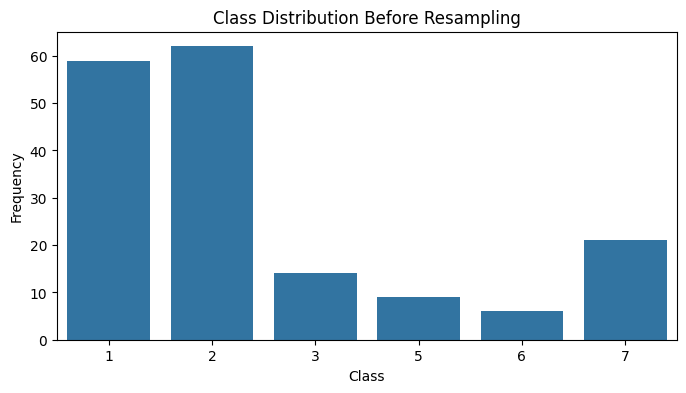

In [14]:
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train)
plt.title("Class Distribution Before Resampling")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [8]:
#Handle class imbalance using SMOTE (oversampling)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

svm.fit(X_train_res, y_train_res)

y_pred_res = svm.predict(X_test)
print("SVM with oversampling (SMOTE):")
print(classification_report(y_test, y_pred_res))

SVM with oversampling (SMOTE):
              precision    recall  f1-score   support

           1       0.62      0.73      0.67        11
           2       0.75      0.43      0.55        14
           3       0.43      1.00      0.60         3
           5       0.67      1.00      0.80         4
           6       1.00      0.67      0.80         3
           7       1.00      0.88      0.93         8

    accuracy                           0.70        43
   macro avg       0.74      0.78      0.72        43
weighted avg       0.75      0.70      0.69        43



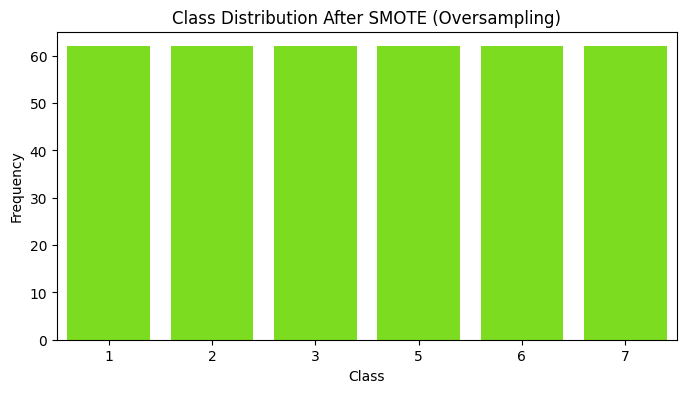

In [20]:
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train_res, color='#7CFC00')
plt.title("Class Distribution After SMOTE (Oversampling)")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [9]:
# Try undersampling to balance the classes
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

svm.fit(X_train_under, y_train_under)

y_pred_under = svm.predict(X_test)
print("SVM with undersampling:")
print(classification_report(y_test, y_pred_under))

SVM with undersampling:
              precision    recall  f1-score   support

           1       0.50      0.82      0.62        11
           2       0.67      0.14      0.24        14
           3       0.14      0.33      0.20         3
           5       0.67      1.00      0.80         4
           6       1.00      0.67      0.80         3
           7       1.00      0.88      0.93         8

    accuracy                           0.58        43
   macro avg       0.66      0.64      0.60        43
weighted avg       0.67      0.58      0.55        43



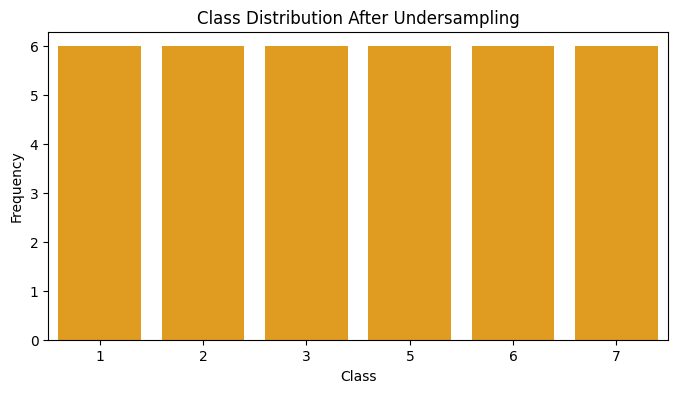

In [21]:
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train_under, color='orange')
plt.title("Class Distribution After Undersampling")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

- Accuracy: The oversampling method retains a higher accuracy (70%) compared to undersampling (58%).
- Performance on Minority Classes:
  - Oversampling (SMOTE) boosts recall for minority classes, like Class 3 (1.00) and Class 5 (1.00), making it more balanced.
  - Undersampling discards data from majority classes, leading to poorer recall and precision for minority classes, particularly Class 2 and Class 3.
- Precision-Recall Balance: SMOTE maintains a better precision-recall balance, particularly for minority classes, with Class 3 showing an impressive recall (1.00). Undersampling, on the other hand, sacrifices the minority classes' representation, leading to poor precision and recall for those classes.